In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Toy data

In [3]:
Train_X = torch.arange(10).to(torch.float32).reshape(10,1)
Train_X_Norm = (Train_X - Train_X.mean())/ Train_X.std()
Train_Y = torch.tensor([1.6, 1.9, 3.7, 2.6, 5.6, 6.9, 7.2, 8.0, 8.6, 9.6])

In [4]:
toy_data = TensorDataset(Train_X_Norm, Train_Y)
data = DataLoader(toy_data, batch_size=5)

# Model, Loss function, optimizer function

In [5]:
class Net(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.L = nn.Linear(in_features, out_features)
    def forward(self,x):
        x = self.L(x)
        return x

In [12]:
model = Net(1, 1)
loss_func = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [13]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[-0.8802]], requires_grad=True)
Parameter containing:
tensor([-0.0009], requires_grad=True)


# Training

In [14]:
def train(model, epoch, data):
    for i in range(epoch):
        for x, y in data:
            pred = model(x)
            loss = loss_func(pred, y)
            loss.backward()

            #Update paramters
            optimizer.step()
            optimizer.zero_grad()
        if i % 10 == 0:
            print(f"Epoch: {i+1}, Error: {loss}")

In [15]:
train(model, 200, data )

Epoch: 1, Error: 115.96316528320312
Epoch: 11, Error: 78.62408447265625
Epoch: 21, Error: 53.22451400756836
Epoch: 31, Error: 35.959983825683594
Epoch: 41, Error: 24.23653793334961
Epoch: 51, Error: 16.28571891784668
Epoch: 61, Error: 10.90200138092041
Epoch: 71, Error: 7.263789176940918
Epoch: 81, Error: 4.811365127563477
Epoch: 91, Error: 3.1634628772735596
Epoch: 101, Error: 2.060619592666626
Epoch: 111, Error: 1.3263448476791382
Epoch: 121, Error: 0.8406875133514404
Epoch: 131, Error: 0.5222251415252686
Epoch: 141, Error: 0.3157735764980316
Epoch: 151, Error: 0.18399836122989655
Epoch: 161, Error: 0.1016954556107521
Epoch: 171, Error: 0.05189822241663933
Epoch: 181, Error: 0.02323245070874691
Epoch: 191, Error: 0.008102087303996086


# To visualize regression line

In [13]:
prediction = model(Train_X_Norm).detach()

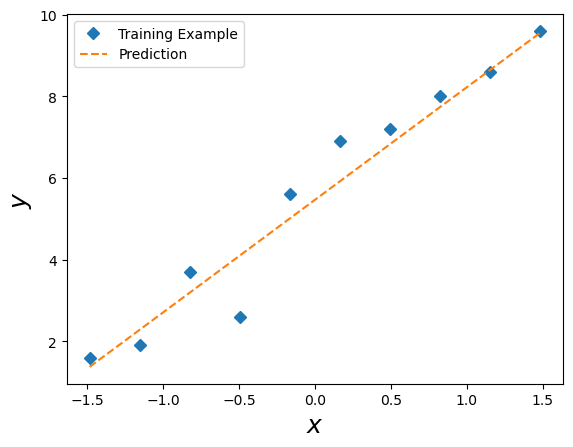

In [14]:
plt.plot(Train_X_Norm,
         Train_Y,
         linestyle="",
         marker="D")

plt.plot(Train_X_Norm,
         prediction,
         linestyle="--")


plt.xlabel("$x$", size=18)
plt.ylabel("$y$", size=18)

plt.legend(['Training Example', 'Prediction'])